In [1]:
import sys
import os

# Add ml/ directory to Python path
project_root = os.path.abspath("..")
ml_path = os.path.join(project_root, "ml")
sys.path.append(ml_path)


In [2]:
from preprocessing import preprocess_data


In [3]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load raw UNSW data
df_small = pd.read_csv(
    "C:/Users/Dell/Desktop/soc-intrusion detection/data/raw/UNSW_NB15_training-set.csv"
)

df_large = pd.read_csv(
    "C:/Users/Dell/Desktop/soc-intrusion detection/data/raw/UNSW_NB15_testing-set.csv"
)

# Decide train/test based on size (same as training)
if df_large.shape[0] > df_small.shape[0]:
    train_df = df_large
    test_df  = df_small
else:
    train_df = df_small
    test_df  = df_large

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (175341, 45)
Test shape: (82332, 45)


In [5]:
binary_model = joblib.load("C:/Users/Dell/Desktop/soc-intrusion detection/ml/models/binary_model.pkl")


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.7.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
X_test, y_test, _ = preprocess_data(test_df, fit=False)

# Probabilities & predictions
y_pred = binary_model.predict(X_test)
y_prob = binary_model.predict_proba(X_test)[:, 1]


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator OrdinalEncoder from version 1.7.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


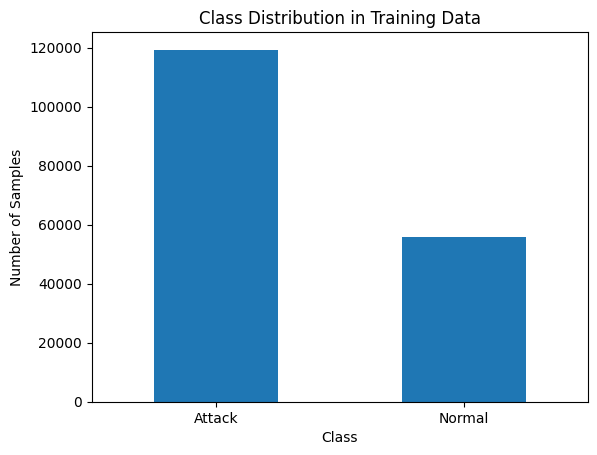

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

labels = train_df["label"].value_counts()

plt.figure()
labels.plot(kind="bar")
plt.xticks([0,1], ["Attack", "Normal"], rotation=0)
plt.title("Class Distribution in Training Data")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()


<Figure size 640x480 with 0 Axes>

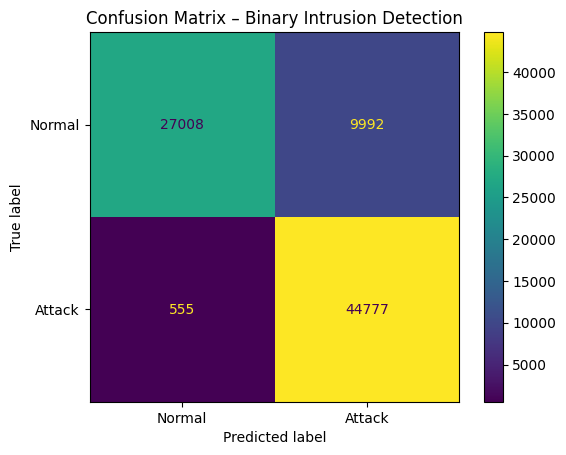

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Normal", "Attack"]
)

plt.figure()
disp.plot()
plt.title("Confusion Matrix – Binary Intrusion Detection")
plt.show()


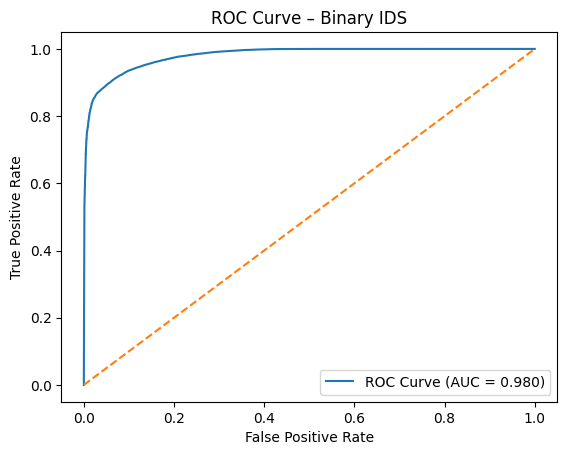

In [9]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Binary IDS")
plt.legend()
plt.show()


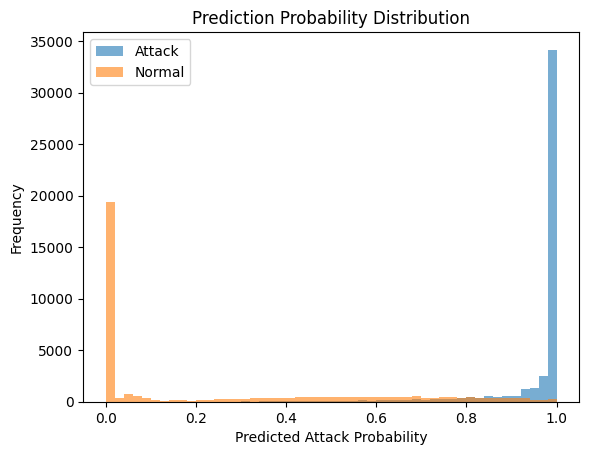

In [10]:
attack_probs = y_prob[y_test == 1]
normal_probs = y_prob[y_test == 0]

plt.figure()
plt.hist(attack_probs, bins=50, alpha=0.6, label="Attack")
plt.hist(normal_probs, bins=50, alpha=0.6, label="Normal")
plt.xlabel("Predicted Attack Probability")
plt.ylabel("Frequency")
plt.title("Prediction Probability Distribution")
plt.legend()
plt.show()
